In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_t= pd.read_csv('/Users/krc/Documents/dev/Mini_project-modeling/data/train_transaction.csv')
train_i = pd.read_csv('/Users/krc/Documents/dev/Mini_project-modeling/data/train_identity.csv')

test_t= pd.read_csv('/Users/krc/Documents/dev/Mini_project-modeling/data/test_transaction.csv')
test_i = pd.read_csv('/Users/krc/Documents/dev/Mini_project-modeling/data/test_identity.csv')
submission = pd.read_csv('/Users/krc/Documents/dev/Mini_project-modeling/data/sample_submission.csv')

In [14]:
list(train_t.columns[train_t.columns.str.contains('V')==True].values)

['V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'V29',
 'V30',
 'V31',
 'V32',
 'V33',
 'V34',
 'V35',
 'V36',
 'V37',
 'V38',
 'V39',
 'V40',
 'V41',
 'V42',
 'V43',
 'V44',
 'V45',
 'V46',
 'V47',
 'V48',
 'V49',
 'V50',
 'V51',
 'V52',
 'V53',
 'V54',
 'V55',
 'V56',
 'V57',
 'V58',
 'V59',
 'V60',
 'V61',
 'V62',
 'V63',
 'V64',
 'V65',
 'V66',
 'V67',
 'V68',
 'V69',
 'V70',
 'V71',
 'V72',
 'V73',
 'V74',
 'V75',
 'V76',
 'V77',
 'V78',
 'V79',
 'V80',
 'V81',
 'V82',
 'V83',
 'V84',
 'V85',
 'V86',
 'V87',
 'V88',
 'V89',
 'V90',
 'V91',
 'V92',
 'V93',
 'V94',
 'V95',
 'V96',
 'V97',
 'V98',
 'V99',
 'V100',
 'V101',
 'V102',
 'V103',
 'V104',
 'V105',
 'V106',
 'V107',
 'V108',
 'V109',
 'V110',
 'V111',
 'V112',
 'V113',
 'V114',
 'V115',
 'V116',
 'V117',
 'V118',
 'V119',
 'V120',
 'V121',
 'V122',
 'V123',
 

In [15]:
tv = train_t.loc[:,list(train_t.columns[train_t.columns.str.contains('V')==True].values)]

In [28]:
nancount = list(tv.isnull().sum().value_counts().index)
tv.isnull().sum().value_counts()

460110    46
314       43
12        32
450909    31
76073     23
77096     22
89164     20
450721    19
168969    18
508595    18
508189    18
449124    16
279287    11
508589    11
1269      11
dtype: int64

In [30]:
for i in nancount:
    print(tv.isnull().sum()[tv.isnull().sum().values==i].index)

Index(['V217', 'V218', 'V219', 'V223', 'V224', 'V225', 'V226', 'V228', 'V229',
       'V230', 'V231', 'V232', 'V233', 'V235', 'V236', 'V237', 'V240', 'V241',
       'V242', 'V243', 'V244', 'V246', 'V247', 'V248', 'V249', 'V252', 'V253',
       'V254', 'V257', 'V258', 'V260', 'V261', 'V262', 'V263', 'V264', 'V265',
       'V266', 'V267', 'V268', 'V269', 'V273', 'V274', 'V275', 'V276', 'V277',
       'V278'],
      dtype='object')
Index(['V95', 'V96', 'V97', 'V98', 'V99', 'V100', 'V101', 'V102', 'V103',
       'V104', 'V105', 'V106', 'V107', 'V108', 'V109', 'V110', 'V111', 'V112',
       'V113', 'V114', 'V115', 'V116', 'V117', 'V118', 'V119', 'V120', 'V121',
       'V122', 'V123', 'V124', 'V125', 'V126', 'V127', 'V128', 'V129', 'V130',
       'V131', 'V132', 'V133', 'V134', 'V135', 'V136', 'V137'],
      dtype='object')
Index(['V279', 'V280', 'V284', 'V285', 'V286', 'V287', 'V290', 'V291', 'V292',
       'V293', 'V294', 'V295', 'V297', 'V298', 'V299', 'V302', 'V303', 'V304',
       'V305

In [33]:
# nan_values groups , len = 15
def nan_group(n):
    return list(tv.isnull().sum()[tv.isnull().sum().values==nancount[n]].index)

Text(0.5, 1.0, 'AAA')

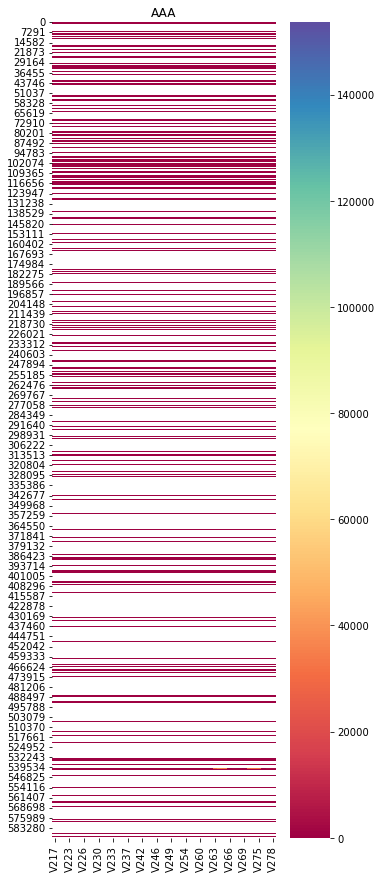

In [83]:
plt.figure(figsize=(5,15))
sns.heatmap(tv.loc[:, nan_group(0)], cmap="Spectral").set_title('AAA')

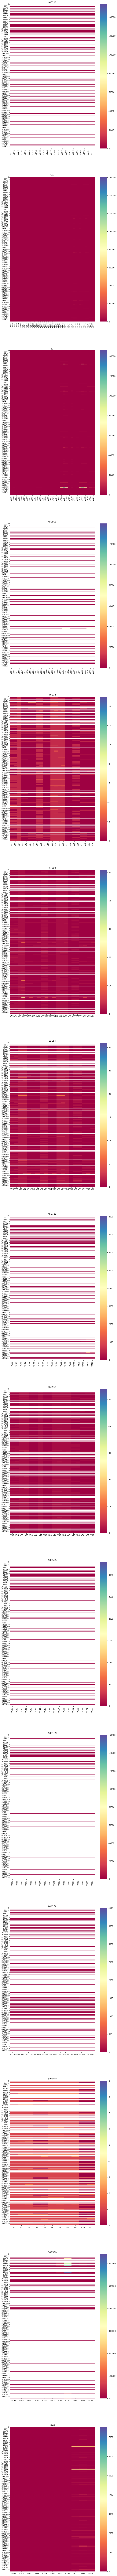

In [84]:
fig, axes = plt.subplots(len(nancount), figsize=(10,250))

for i in range(len(nancount)):
    sns.heatmap(data=tv.loc[:, nan_group(i)], ax=axes[i],cmap="Spectral").set_title(nancount[i])

plt.show()

In [69]:
sam = []
for i in range(len(nancount)):
    sam.append(nan_group(i)[0])

In [82]:
corr = tv.loc[:,sam].corr()
corr.columns = nancount
corr.index = nancount
corr

,460110,314,12,450909,76073,77096,89164,450721,168969,508595,508189,449124,279287,508589,1269
460110,1.000000,0.895339,0.896129,0.964245,NaN,NaN,NaN,0.066290,NaN,0.022378,0.908627,0.087145,NaN,0.760881,0.044837
314,0.895339,1.000000,0.998710,0.991699,-0.043630,-0.044468,-0.002090,-0.012650,0.058172,-0.004209,0.999949,-0.011283,0.002168,0.989536,0.001532
12,0.896129,0.998710,1.000000,0.991924,-0.045354,-0.045269,-0.013293,-0.005912,-0.007955,-0.003991,0.999624,-0.005451,0.002316,0.989294,0.012744
450909,0.964245,0.991699,0.991924,1.000000,NaN,NaN,NaN,0.003388,NaN,-0.002513,0.992216,0.000413,NaN,0.982570,-0.003072
76073,NaN,-0.043630,-0.045354,NaN,1.000000,0.635155,0.708756,NaN,0.659987,NaN,NaN,NaN,0.007637,NaN,0.018060
77096,NaN,-0.044468,-0.045269,NaN,0.635155,1.000000,0.658947,NaN,0.630985,NaN,NaN,NaN,0.011176,NaN,0.051619
89164,NaN,-0.002090,-0.013293,NaN,0.708756,0.658947,1.000000,NaN,0.743539,NaN,NaN,NaN,0.005683,NaN,0.029177
450721,0.066290,-0.012650,-0.005912,0.003388,NaN,NaN,NaN,1.000000,NaN,0.534889,-0.007574,0.602435,NaN,-0.013901,0.510292
168969,NaN,0.058172,-0.007955,NaN,0.659987,0.630985,0.743539,NaN,1.000000,NaN,NaN,NaN,0.005627,NaN,0.007298
508595,0.022378,-0.004209,-0.003991,-0.002513,NaN,NaN,NaN,0.534889,NaN,1.000000,-0.002857,0.462047,NaN,-0.008314,0.504366


In [113]:
rowlen = []
for i in range(15):
    rowlen.append(len(nan_group(i)))

In [ ]:
for i in range(len(nancount)):
    tv.loc[:, nan_group(i)].sum(axis=1)

In [134]:
s = tv.loc[:,nan_group(i)].isnull().sum(axis=1)

In [140]:
# check V group pattern
for i in range(len(nancount)):
    print(nancount[i])
    print(tv.loc[:,nan_group(i)].isnull().sum(axis=1)[(tv.loc[:,nan_group(i)].isnull().sum(axis=1).values != 0) & (tv.loc[:,nan_group(i)].isnull().sum(axis=1).values != rowlen[i])])

460110
Series([], dtype: int64)
314
Series([], dtype: int64)
12
Series([], dtype: int64)
450909
Series([], dtype: int64)
76073
Series([], dtype: int64)
77096
Series([], dtype: int64)
89164
Series([], dtype: int64)
450721
Series([], dtype: int64)
168969
Series([], dtype: int64)
508595
Series([], dtype: int64)
508189
Series([], dtype: int64)
449124
Series([], dtype: int64)
279287
Series([], dtype: int64)
508589
Series([], dtype: int64)
1269
Series([], dtype: int64)


In [149]:
# C column check
cl = list(train_t.columns[train_t.columns.str.contains('C')==True].values)
cl.pop(0)

'ProductCD'

In [153]:
tc = train_t.loc[:,cl]

<AxesSubplot:>

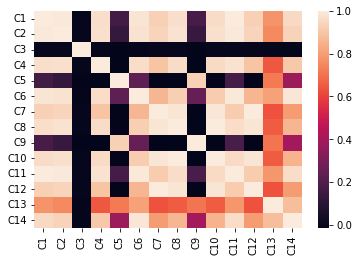

In [152]:
sns.heatmap(train_t.loc[:,cl].corr())

In [162]:
tc.describe()

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14
count,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000
mean,14.092458,15.269734,0.005644,4.092185,5.571526,9.071082,2.848478,5.144574,4.480240,5.240343,10.241521,4.076227,32.539918,8.295215
std,133.569018,154.668899,0.150536,68.848459,25.786976,71.508467,61.727304,95.378574,16.674897,95.581443,94.336292,86.666218,129.364844,49.544262
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,1.000000
75%,3.000000,3.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,2.000000,0.000000,2.000000,0.000000,12.000000,2.000000
max,4685.000000,5691.000000,26.000000,2253.000000,349.000000,2253.000000,2255.000000,3331.000000,210.000000,3257.000000,3188.000000,3188.000000,2918.000000,1429.000000


In [164]:
tc[tc.C1==4685]

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14
56062,4685.0,5691.0,0.0,2253.0,0.0,2253.0,2255.0,3331.0,0.0,3257.0,3188.0,3188.0,2918.0,1429.0


In [165]:
tc[tc.C3==26]

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14
584328,1.0,3.0,26.0,1.0,0.0,0.0,0.0,8.0,0.0,1.0,3.0,0.0,26.0,1.0
